In [12]:
import cv2
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

(496, 1536)


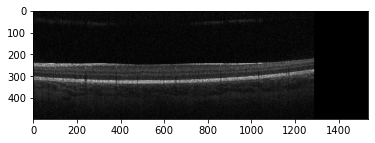

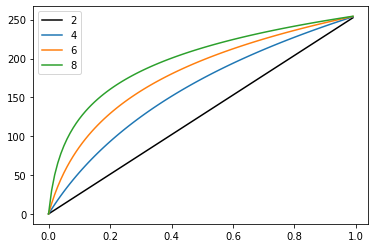

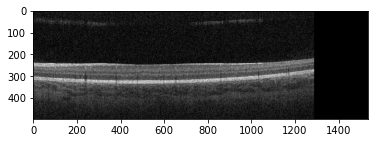

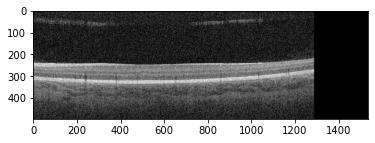

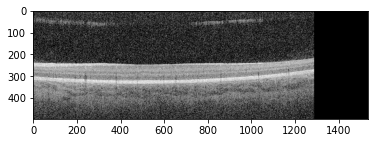

In [13]:
c = np.arange(2, 16, 2)
x = np.arange(0, 1, 1/100)
y = np.zeros(x.shape)
z = np.zeros(x.shape)
# image = cv2.imread('dataset/128_3C/train_images/Anonym_1_1896_1.tiff', 0) #
image = cv2.imread('../dataset/224_2C/Images_train_large/Anonym_1_1907.tiff', 0)
image = np.array(image).astype('float32') / 255.
print(image.shape)
plt.imshow(image, cmap='gray')
plt.figure()
plt.plot(x,np.arange(0,255,255/100), c='k')
for m in range(2, 8, 2):
    for i in range(0, x.shape[0]):
        y[i] = 255 * math.log(2**m * x[i] + 1)/math.log(2**m + 1)
        # z[i] = 255 * math.exp(m*x[i] + 1) / math.exp(m + 1)
    
    plt.plot(x, y)
    # plt.plot(x, z)
plt.legend(c)
plt.show()
out1 = np.zeros(image.shape)
out2 = np.zeros(image.shape)
for m in range(2, 8, 2):
    plt.figure()
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            out1[i,j] = 255 * math.log(2**m * image[i,j] + 1)/math.log(2**m + 1)
    plt.imshow(out1/255., cmap='gray')
    
plt.show()

(224, 224)


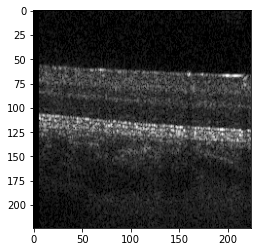

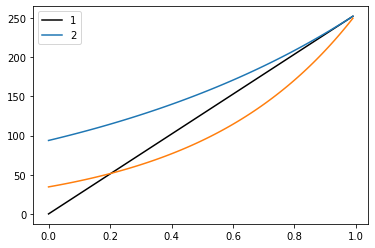

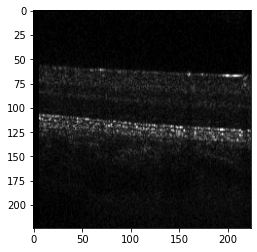

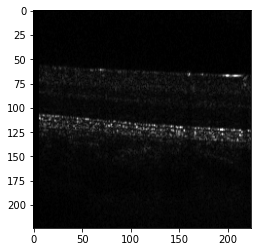

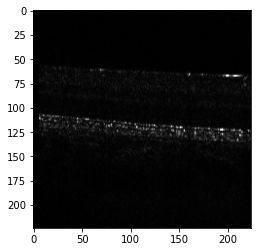

In [101]:
c = np.arange(1, 3)
x = np.arange(0, 1, 1/100)
y = np.zeros(x.shape)
z = np.zeros(x.shape)
image = cv2.imread('../dataset/224_2C/train_images/Anonym_1_1906_1.tiff', 0)
# image = cv2.imread('dataset/128_3C/train_images/IRD_RPE65_01_I_111_2_12.tiff', 0)
image = np.array(image).astype('float32') / 255.
print(image.shape)
plt.imshow(image, cmap='gray')
plt.figure()
plt.plot(x,np.arange(0,255,255/100), c='k')
for m in range(1, 3):
    for i in range(0, x.shape[0]):
        y[i] = 255 * math.log(2**m * x[i] + 1)/math.log(2**m + 1)
        z[i] = 255 * math.exp(m*x[i]) / math.exp(m)
    #plt.plot(x, y)
    plt.plot(x, z)
plt.legend(c)
plt.show()
out1 = np.zeros(image.shape)
out2 = np.zeros(image.shape)
for m in range(2, 5):
    plt.figure()
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            out2[i,j] = 255 * math.exp(m*image[i,j] - 2) / math.exp(m- 2)
    plt.imshow(out2/255., cmap='gray')

plt.show()

1.9833151501514412
0.7524357082990432
0.9667330830505252


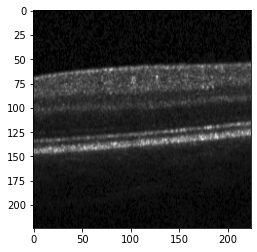

In [87]:
import cv2


def michelson(gray):
    hist, bins = np.histogram(gray.ravel(),256,[0,256])
    hist = np.trim_zeros(hist)
    mid = math.ceil(len(hist)/2)
    hminp = hist[:mid]
    hmaxp = hist[mid:]
    lmax = np.mean(hmaxp)
    lmin = np.mean(hminp)
    contrast = abs((lmax - lmin) / (lmax + lmin))
    return float(contrast)

image = cv2.imread('../dataset/224_2C/train_images/Anonym_1_1903_6.tiff', cv2.IMREAD_COLOR)
c = np.random.uniform(1, 3)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.figure()
# plt.imshow(out2/255., cmap='gray')
contrast = michelson(gray)
gray = gray / 255.
proc = np.zeros(gray.shape)
for i in range(0, gray.shape[0]):
    for j in range(0, gray.shape[1]):
        proc[i,j] = 255 * math.exp(1*c*gray[i,j]) / math.exp(c)
print(c)
print(contrast)
if contrast > 0.5:
    out = proc
else:
    out = gray
print(michelson(out))
plt.figure()
plt.imshow(out, cmap='gray')